il y a bien n(n-1)/2= 45 arêtes possibles


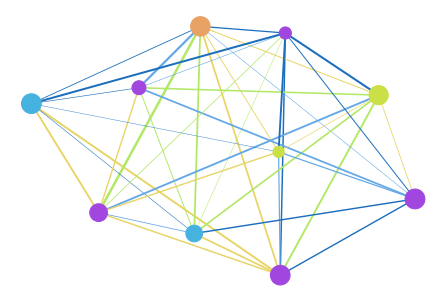

In [10]:
"""
Generating a random undirected graph
"""

import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_undirected_graph(n: int, p: int):
    """
        Function used to generate a random undirected graph.

        :param n: number of nodes in the graph
        :param p: number of edges in the graph

        Libraries used :
        ----------------
        networkx
        matplotlib

    """
    G = nx.Graph()

    if p > n * (n - 1) / 2:
        raise ValueError('The number of edges is too large !')

    # in an undirected graph, we dont need to consider the inverse of an edge
    all_edges = [{i, j} for i in range(1, n + 1) for j in range(i + 1, n + 1)]
    # remove edges from one node to itself
    all_edges = [edge for edge in all_edges if len(edge) == 2]
    # shuffle the order of the edges
    random.shuffle(all_edges)

    # double check that we did not make an error while creating our set of edges
    if len(all_edges) == n * (n - 1) / 2:
        print(f"il y a bien n(n-1)/2= {int((n * (n - 1))/2)} arêtes possibles")

    # set available colors
    available_node_colors = ["#46b2e0", "#cbe046", "#a246e0", "#e8a264"]
    available_edges_colors = ["#e8d464", "#b1e864", "#64a8e8", "#1c6fbd"]

    # add nodes to the graph
    for i in range(1, n + 1):
        G.add_node(i)

    for j in range(p - 1):
        random_edge = all_edges.pop()
        node_a = random_edge.pop()
        node_b = random_edge.pop()
        G.add_edge(node_a, node_b)

    # set random node colors
    node_colors = list()
    node_sizes = list()
    for node in G.nodes:
        node_colors.append(random.choice(available_node_colors))
        node_sizes.append(random.uniform(50, 400))

    # set random edges colors
    edge_colors = list()
    edge_widths = list()
    for edge in G.edges:
        edge_colors.append(random.choice(available_edges_colors))
        edge_widths.append(random.uniform(0.2, 2.5))

    # visualize and save the graph
    graph_name = f"images/random_undirected_{n}_vx_{p}_edgs.pdf"
    nx.draw(G,
            node_size=node_sizes,
            node_color=node_colors,
            edge_color=edge_colors,
            width=edge_widths)

generate_random_undirected_graph(10, 40)